In [0]:
import cv2
import numpy as np

img = cv2.imread('Cat.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp)

cv2.imwrite('sift_keypoints.jpg',img)

TypeError: ignored

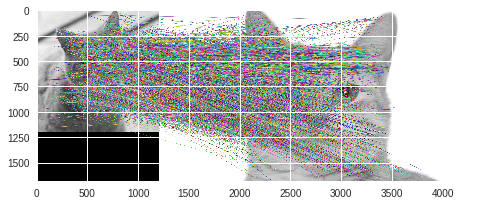

(<matplotlib.image.AxesImage at 0x7f46de5a16a0>, None)

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('cat.jpg',0)          # queryImage
img2 = cv2.imread('cat2.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

        
# draw_params = dict(matchColor = (0,255,0),
#                    singlePointColor = (255,0,0),
#                    matchesMask = matchesMask,
#                    flags = 0)

# img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)        
        
# cv2.drawMatchesKnn expects list of lists as matches.
#img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

plt.imshow(img3),plt.show()

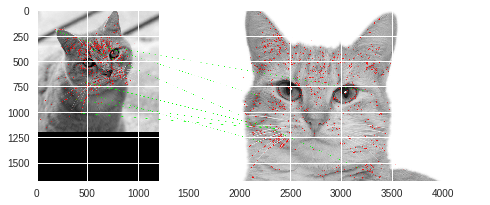

(<matplotlib.image.AxesImage at 0x7f46da489898>, None)

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('cat.jpg',0)          # queryImage
img2 = cv2.imread('cat2.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

In [0]:
!pip install opencv-python==3.4.2.16

    100% |████████████████████████████████| 25.0MB 1.3MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [0]:
!pip install opencv-contrib-python==3.4.2.16

    100% |████████████████████████████████| 30.6MB 1.2MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18
